## Word-embeddings for similar term detection and synonym expansion 

In [1]:
# This code is based on: 
# Mahmoud El-Haj's visualization tutorial for Machine Learning and NLP
# Jeff Delaney at Kaggle (kaggle.com/jeffd23):  https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
# Many thanks to Mahmoud and Jeff 

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Word2Vec model
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [4]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('teal')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
        
    # Reduces the dimensionality from 100 to 11 dimensions with PCA
    reduc = PCA(n_components=10, ).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # background color
    ax = plt.axes()
    ax.set_facecolor('ghostwhite')
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    # Hide grid
    plt.grid(False)
    #plt.savefig(pltFileName)

## Test with embeddings trained on COVID-19 corpus

In [5]:
from gensim.models.wrappers import FastText
model2 = FastText.load_fasttext_format('fasttext-covid19-embeddings/covid-19-embeddings-es-d100-min5-uncased.bin')

In [6]:
wv_word = "favipiravir"
model2.most_similar(wv_word)

[('avifavir', 0.8190910220146179),
 ('maraviroc', 0.8054166436195374),
 ('darunavir', 0.769184947013855),
 ('lopinavir', 0.7591572999954224),
 ('ribavirina', 0.7528921961784363),
 ('lopinavir-ritonavir', 0.7527613043785095),
 ('baricitinib', 0.7462754845619202),
 ('colchicine', 0.7396938800811768),
 ('remdesevir', 0.7393302917480469),
 ('oseltamivir', 0.7388783693313599)]

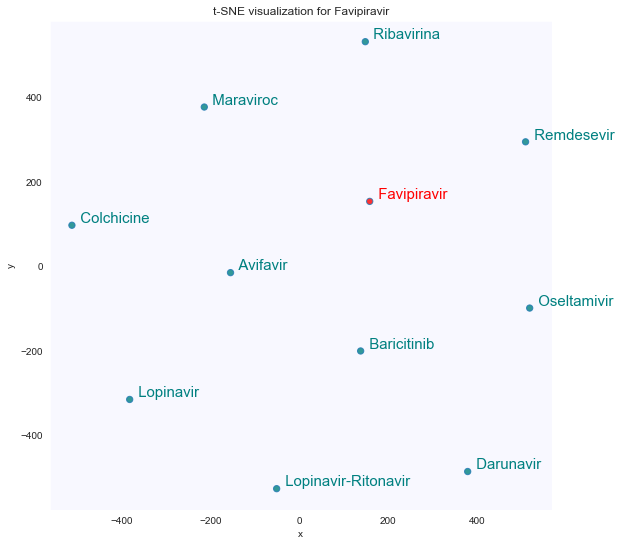

In [7]:
tsnescatterplot(model2, wv_word, [i[0] for i in model2.wv.most_similar(wv_word)]) 

In [8]:
wv_word = "opaganib"
model2.most_similar(wv_word)

[('propaganda', 0.7785313129425049),
 ('propagan', 0.6988972425460815),
 ('propagando', 0.6870874166488647),
 ('copago', 0.66051185131073),
 ('rusos', 0.6488878130912781),
 ('mugeju', 0.640055775642395),
 ('copa', 0.6387958526611328),
 ('popayán', 0.6376399397850037),
 ('#sánchezveteya', 0.6343621611595154),
 ('rumor', 0.6332772970199585)]

In [9]:
wv_word = "colchicina"
model2.most_similar(wv_word)

[('colchicine', 0.8328693509101868),
 ('ruxolitinib', 0.7914982438087463),
 ('antipalúdico', 0.788130521774292),
 ('pirfenidona', 0.7871890664100647),
 ('colchón', 0.7784891724586487),
 ('doxiciclina', 0.7716015577316284),
 ('abx464', 0.7595564126968384),
 ('tofacitinib', 0.7592284679412842),
 ('dfv890', 0.7590133547782898),
 ('m04ac01', 0.7574728727340698)]

In [10]:
wv_word = "remdesivir"
model2.most_similar(wv_word)

[('remdesevir', 0.8997074961662292),
 ('veklury', 0.7676551938056946),
 ('veklury®', 0.7331488132476807),
 ('antiviral', 0.7199548482894897),
 ('acalabrutinib', 0.7145290970802307),
 ('oseltamivir', 0.7143322825431824),
 ('baricitinib', 0.6989405751228333),
 ('darunavir', 0.6949024796485901),
 ('tofacitinib', 0.6929934620857239),
 ('fármaco', 0.6774528622627258)]

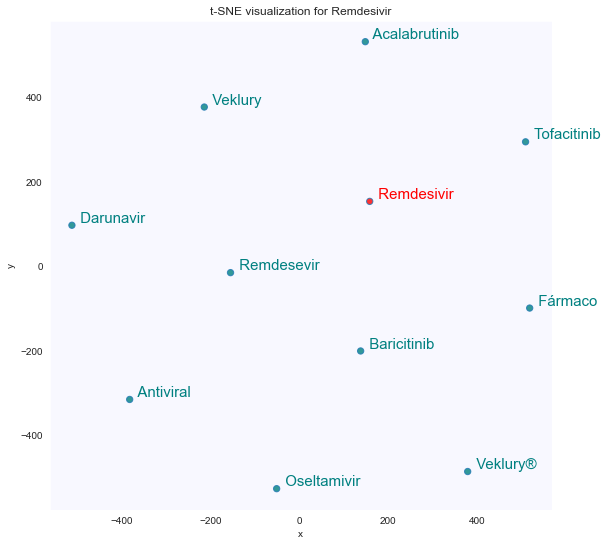

In [11]:
# Note in the scatterplot: Veklury is the brand name of remdesivir
tsnescatterplot(model2, wv_word, [i[0] for i in model2.wv.most_similar(wv_word)]) 

In [12]:
wv_word = "plitidepsina"
model2.most_similar(wv_word)

[('oatp1b3', 0.7323133945465088),
 ('eef1a', 0.729608952999115),
 ('melatonina', 0.7226555347442627),
 ('acalabrutinib', 0.7125130891799927),
 ('proteasa', 0.7097486257553101),
 ('profármaco', 0.7081688642501831),
 ('antiviral', 0.7076476812362671),
 ('fármaco', 0.7059628963470459),
 ('hcr040', 0.7054573893547058),
 ('2c9', 0.7044268250465393)]

### TSNE of the most frequent terms in the COVID-19 corpus

In [13]:
%%capture
#Plotting similarities of a word embedding model using a scatter plot from t-SNE
#(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.
def tsne_plot(model,modelName):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    pltFileName = 'plots'+'/'+'word_embeddings'+'_'+modelName+'.pdf';
    plt.savefig(pltFileName)
    plt.show()

In [14]:
from gensim import utils
from gensim.corpora.dictionary import Dictionary

In [15]:
# Compute the term frequencies
# load corpus text data
TEXT_DATA_DIR = "../../COVID19/corpus/all-for-training/covid-19-corpus-24042021.tok"

# Concatenate all sentences into a single list 
# Each sentence must be a list of string tokens:
all_sentences = []
with open(TEXT_DATA_DIR, 'r', encoding='utf-8') as f:
    Lines = f.readlines()
    for line in Lines:
        line = line.strip()
        Tokens = line.split()
        all_sentences.append(Tokens)

In [16]:
# Flat the list of list of sentences to one list of tokens
# If sentences are preserved, frequencies are counted per sentence (not in the whole corpus)
all_tokens = [item for sublist in all_sentences for item in sublist]
print(all_tokens[0:10])
print(type(all_tokens))
print(len(all_tokens))

['2020', ',', 'un', 'año', 'a', 'la', 'caza', 'del', 'coronavirus', 'sars-cov-2']
<class 'list'>
7017450


In [17]:
# Remove stopwords, numbers, toponyms and punctuation
# List of stop words to detect in multiword terms
Stopwords = []
with open('stopwords_es.txt', 'r', encoding='utf-8') as f:
    Lines = f.readlines()
    for line in Lines:
        line = line.strip()
        Stopwords.append(line)

Punct = [',', '.', "'", '!', '!', '¿', '?', '=', ';', ':', '-', '+', '*', '', '"', '(', ')', '[', ']', '%', '/']

all_tokens_cleaned = []
for token in all_tokens:
    if (token not in Stopwords) and (token not in Punct) and not (token.isnumeric()):
        all_tokens_cleaned.append(token)

In [18]:
# Dictionary of corpus terms (use list: [])
dct = Dictionary([all_tokens_cleaned])

In [19]:
# Convert tokens into the bag-of-words (BoW) format; then, get frequencies
Data = dct.doc2bow(all_tokens_cleaned)

In [20]:
# Map dictionary ids to frequencies (print only 10 items)
for i in list(dct)[:10]:
    print(dct[i],Data[i][1])

 1
a 1
concederán 1
de 1
del 3
en 1
jefa 1
obesidad 1
y 1
aporta 1


In [21]:
# Save tokens and frequencies in dictionary
FreqDict = {}

for i in dct:
    FreqDict[dct[i]] = Data[i][1]

# Then sort dictionary and print tokens with frequencies to file 
SortedFreq = sorted(FreqDict.items(), key=lambda x: x[1], reverse=True)

with open("freq_list.txt",'w',encoding='utf-8') as f:
    for Item in SortedFreq:
        print(Item[0],Item[1],file=f)

# Get the 100 most frequent terms
most_freq_100 = SortedFreq[:100]
print(most_freq_100)


[('covid-19', 43080), ('pacientes', 19233), ('paciente', 18146), ('personas', 14154), ('salud', 14069), ('estudio', 12757), ('datos', 11804), ('coronavirus', 11747), ('virus', 11363), ('pandemia', 11284), ('vacunas', 10088), ('casos', 9589), ('vacuna', 9557), ('infección', 8707), ('enfermedad', 8510), ('sars-cov-2', 8249), ('riesgo', 7779), ('información', 7052), ('medidas', 6847), ('rx', 6820), ('días', 6796), ('tratamiento', 6695), ('vacunación', 6474), ('tórax', 6237), ('países', 6069), ('años', 5775), ('dosis', 5709), ('caso', 5408), ('atención', 5403), ('clínicos', 5402), ('hallazgos', 5309), ('pruebas', 5299), ('síntomas', 5285), ('estudios', 5228), ('seguridad', 4823), ('anticuerpos', 4786), ('pulmonar', 4773), ('población', 4718), ('tiempo', 4645), ('millones', 4606), ('respuesta', 4489), ('sanidad', 4487), ('control', 4441), ('sistema', 4324), ('derecho', 4313), ('día', 4313), ('covid', 4242), ('resultados', 4212), ('hospital', 4106), ('profesionales', 4053), ('recursos', 4039

In [22]:
# (Alternative) If no corpus is data available, load the saved frequency list of terms + frequencies
SortedFreq = []
with open("freq_list.txt",'r',encoding='utf-8') as FreqData:
    Lines = FreqData.readlines()
    for line in Lines:
        line = line.strip()
        token,freq = re.search("([^ ]+) ([^ ]+)",line).group(1,2)
        SortedFreq.append((token,freq))

# Get the 100 most frequent terms
most_freq_100 = SortedFreq[:100]
print(most_freq_100)


[('covid-19', '43080'), ('pacientes', '19233'), ('paciente', '18146'), ('personas', '14154'), ('salud', '14069'), ('estudio', '12757'), ('datos', '11804'), ('coronavirus', '11747'), ('virus', '11363'), ('pandemia', '11284'), ('vacunas', '10088'), ('casos', '9589'), ('vacuna', '9557'), ('infección', '8707'), ('enfermedad', '8510'), ('sars-cov-2', '8249'), ('riesgo', '7779'), ('información', '7052'), ('medidas', '6847'), ('rx', '6820'), ('días', '6796'), ('tratamiento', '6695'), ('vacunación', '6474'), ('tórax', '6237'), ('países', '6069'), ('años', '5775'), ('dosis', '5709'), ('caso', '5408'), ('atención', '5403'), ('clínicos', '5402'), ('hallazgos', '5309'), ('pruebas', '5299'), ('síntomas', '5285'), ('estudios', '5228'), ('seguridad', '4823'), ('anticuerpos', '4786'), ('pulmonar', '4773'), ('población', '4718'), ('tiempo', '4645'), ('millones', '4606'), ('respuesta', '4489'), ('sanidad', '4487'), ('control', '4441'), ('sistema', '4324'), ('derecho', '4313'), ('día', '4313'), ('covid',

In [23]:
%%capture
# Plot TSNE of word list (previous function, slightly modified)
def tsne_plot_word_list(model,WordList):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for tuple_w_f in WordList:
        word = tuple_w_f[0]
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=4000, random_state=28)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(15, 15)) 
    # background color
    ax = plt.axes()
    ax.set_facecolor('ghostwhite')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 4),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontsize=12.5)
    #pltFileName = 'plots'+'/'+'word_embeddings'+'_'+modelName+'.pdf';
    #plt.savefig(pltFileName)
    plt.grid(False)
    plt.show()
    
    

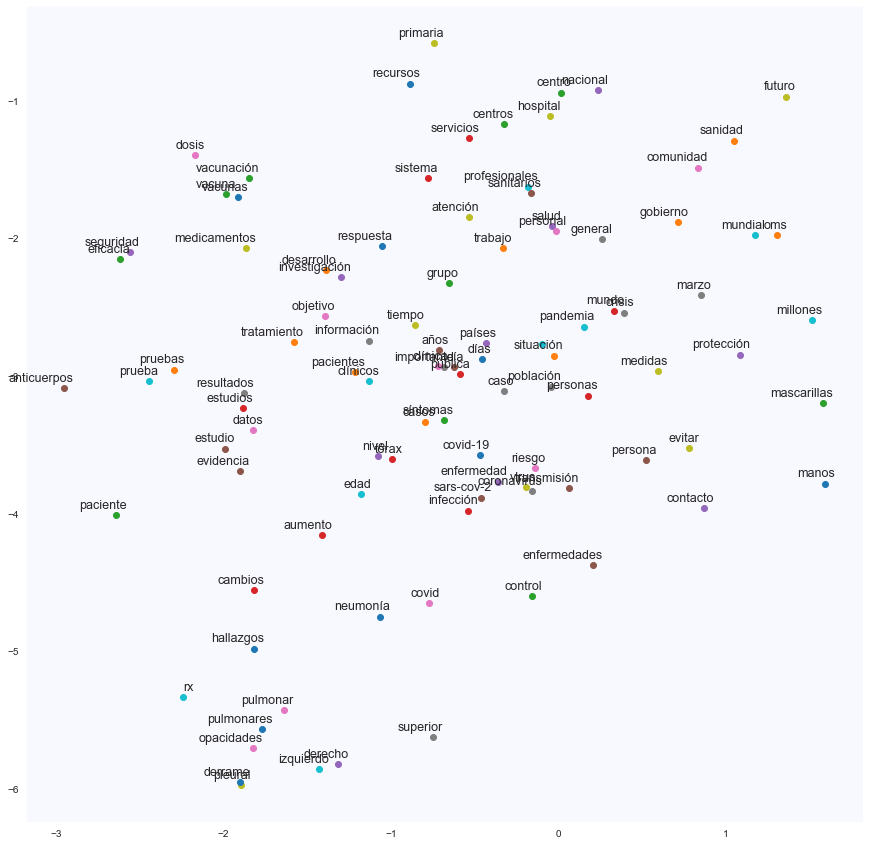

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # plotting the w2v model for words occuring more than 50 times
    tsne_plot_word_list(model2,most_freq_100)